In [13]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [14]:
#Load data
happy16=pd.DataFrame(pd.read_csv('CSVs/Happiness_2016.csv'))
alcohol=pd.DataFrame(pd.read_csv('CSVs/total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv'))
alcohol.head()

,Entity,Code,Year,"Alcohol consumption (litres per capita) (liters of pure alcohol, projected estimates, 15+ years of age)"
0,Afghanistan,AFG,2016,0.2
1,Albania,ALB,2016,7.5
2,Algeria,DZA,2016,0.9
3,Andorra,AND,2016,11.3
4,Angola,AGO,2016,6.4


In [15]:
#Clean alcohol dataframe
alcohol=alcohol.rename(columns={'Entity':'Country','Alcohol consumption (litres per capita) (liters of pure alcohol, projected estimates, 15+ years of age)':'Alcohol consumption (litres per capita)'})
alcohol=alcohol[['Country','Code','Alcohol consumption (litres per capita)']]
alcohol.head()

,Country,Code,Alcohol consumption (litres per capita)
0,Afghanistan,AFG,0.2
1,Albania,ALB,7.5
2,Algeria,DZA,0.9
3,Andorra,AND,11.3
4,Angola,AGO,6.4


In [16]:
#Clean happiness dataframe for 2016
country_happy16=happy16[['Country','Happiness Score']]
country_happy16=country_happy16.rename(columns={'Happiness Score':'2016 Happiness Score'})
country_happy16.head()

,Country,2016 Happiness Score
0,Denmark,7.526
1,Switzerland,7.509
2,Iceland,7.501
3,Norway,7.498
4,Finland,7.413


In [17]:
#Read CSV with ISO country codes, merge with happiness dataframe for 2016
iso=pd.read_csv('CSVs/country_iso.csv')
iso=iso.drop(['Unnamed: 0'], axis=1)
iso=iso.rename(columns={'iso_a3':'Code'})
happy=pd.merge(country_happy16, iso, on='Country', how='inner')
happy.head()

,Country,2016 Happiness Score,Happiness score,Code
0,Denmark,7.526,7.600,DNK
1,Switzerland,7.509,7.480,CHE
2,Iceland,7.501,7.494,ISL
3,Norway,7.498,7.554,NOR
4,Finland,7.413,7.769,FIN


In [18]:
#Merge happiness and alcohol data
happy_alcohol = pd.merge(happy, alcohol, on='Code', how='inner')
happy_alcohol = happy_alcohol.replace(r'^\s*$', np.nan, regex=True)
happy_alcohol = happy_alcohol.dropna(how='any')
happy_alcohol.head()

,Country_x,2016 Happiness Score,Happiness score,Code,Country_y,Alcohol consumption (litres per capita)
0,Denmark,7.526,7.600,DNK,Denmark,10.4
1,Switzerland,7.509,7.480,CHE,Switzerland,11.5
2,Iceland,7.501,7.494,ISL,Iceland,9.1
3,Norway,7.498,7.554,NOR,Norway,7.5
4,Finland,7.413,7.769,FIN,Finland,10.7


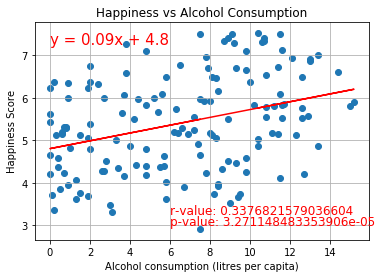

R-value: 0.3376821579036604, P-value: 3.271148483353906e-05


In [20]:
#Linear Regression!
y_values=happy_alcohol['2016 Happiness Score']
x_values=happy_alcohol['Alcohol consumption (litres per capita)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Happiness vs Alcohol Consumption')
plt.xlabel('Alcohol consumption (litres per capita)')
plt.ylabel('Happiness Score')
r_value=(f"r-value: {rvalue}")
p_value=(f"p-value: {pvalue}")
plt.annotate(line_eq,(0,7.25),fontsize=15,color="red")
plt.annotate(r_value,(6,3.25),fontsize=12,color="red")
plt.annotate(p_value,(6,3),fontsize=12,color="red")
plt.grid()
plt.savefig('Images/alcohol.png')
plt.show()
print(f"R-value: {rvalue}, P-value: {pvalue}")

In [21]:
#Moderate positive correlation!
len(happy_alcohol)

145

In [24]:
#import dataset with geographic info to plot chorograph
import geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'iso_a3':'Code'}) 
world = pd.merge(world, happy_alcohol, on='Code', how='inner')
world.head()

,pop_est,continent,name,Code,gdp_md_est,geometry,Country_x,2016 Happiness Score,Happiness score,Country_y,Alcohol consumption (litres per capita)
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,3.666,3.231,Tanzania,9.4
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7.404,7.278,Canada,8.9
2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,7.104,6.892,United States,9.8
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,5.919,5.809,Kazakhstan,7.7
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,5.987,6.174,Uzbekistan,2.7


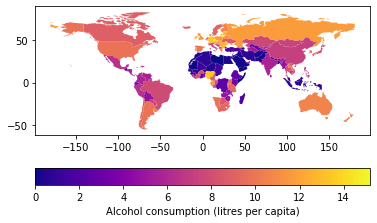

In [29]:
#Chorograph of Air Pollution
fig, ax = plt.subplots(1,1)
world.plot(column='Alcohol consumption (litres per capita)', ax=ax, legend=True, cmap='plasma',
           legend_kwds={'label': "Alcohol consumption (litres per capita)",'orientation': "horizontal"})
plt.savefig('Images/alcohol_consumption_map.png')

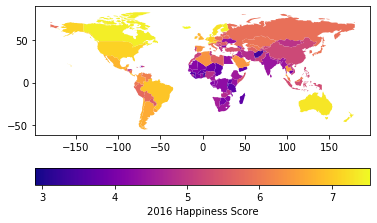

In [28]:
fig, ax = plt.subplots(1,1)
world.plot(column='2016 Happiness Score', ax=ax, legend=True, cmap='plasma',
           legend_kwds={'label': "2016 Happiness Score",'orientation': "horizontal"})
plt.savefig('Images/2016_happiness_map.png')